In [25]:
%matplotlib inline

import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import io
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib

from scipy import stats

from plotly.graph_objs import Scatter, Figure, Layout, Choropleth, Bar, Heatmap
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

from math import sin, cos, sqrt, atan2, radians
from shapely.geometry import asShape
from descartes import PolygonPatch

In [2]:
init_notebook_mode(connected=True)

In [21]:
def print_div(x):
    r = x.replace("\\u00e1","á").replace("\\u00e9","é").replace("\\u00ed","í").replace("\\u00f3","ó").replace("\\u00fa","ú").replace("\\u00c1","Á").replace("\\u00c9","É").replace("\\u00cd","Í").replace("\\u00d3","Ó").replace("\\u00da","Ú").replace("\\u00f1","ñ").replace("\\u00d1","Ñ")
    print(r)

In [3]:
data_map = json.load(open("./data/colombia_deptos_equal_map.json"))
#data_map = json.load(open("./data/colombia_std_names.geojson"))

In [4]:
r = requests.get('https://docs.google.com/spreadsheet/ccc?key=1e3PXAVDF_gPTx-_GTHU9hTAClEKJj5Y_D2_YsW6Vd6U&output=csv')
#https://docs.google.com/spreadsheets/d/1e3PXAVDF_gPTx-_GTHU9hTAClEKJj5Y_D2_YsW6Vd6U/edit?usp=sharing
data = r.content
df = pd.read_csv(io.StringIO(data.decode("utf-8")))

In [5]:
def get_distance(p0, p1):
    R = 6373.0

    lat1 = radians(p0[1])
    lon1 = radians(p0[0])
    lat2 = radians(p1[1])
    lon2 = radians(p1[0])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    
    return distance

In [6]:
coor_bog = [-74.214454, 4.288579]

In [7]:
df['dist_bogota'] = df.apply(lambda x:int(get_distance(coor_bog, [x['centroide_depto_x'], x['centroide_depto_y']])), axis = 1)

In [8]:
df

,centroide_depto_x,centroide_depto_y,nombre_depto,pob2015,anticorrupcion2018,dist_bogota
0,-71.527141,-1.561405,AMAZONAS,76243,18.50,715
1,-75.593959,6.916388,ANTIOQUIA,6534764,27.32,329
2,-70.986638,6.536576,ARAUCA,262315,24.64,436
3,-74.982576,10.664320,ATLANTICO,2461001,23.53,714
4,-74.214454,4.288579,BOGOTA,7980001,45.74,0
5,-74.516938,8.718946,BOLIVAR,2097086,21.63,493
6,-73.123351,5.757728,BOYACA,1276367,41.38,203
7,-75.338979,5.332001,CALDAS,988003,37.18,170
8,-73.986060,0.776007,CAQUETA,477619,25.05,391
9,-71.622890,5.368558,CASANARE,356438,33.87,311


In [9]:
d_names = {
    "AMAZONAS":"Amazonas",
    "ANTIOQUIA":"Antioquia",
    "ARAUCA":"Arauca",
    "ATLANTICO":"Atlántico",
    "BOGOTA":"Bogotá",
    "BOLIVAR":"Bolívar",
    "BOYACA":"Boyacá",
    "CALDAS":"Caldas",
    "CAQUETA":"Caquetá",
    "CASANARE":"Casanare",
    "CAUCA":"Cauca",
    "CESAR":"Cesar",
    "CHOCO":"Chocó",
    "CORDOBA":"Córdoba",
    "CUNDINAMARCA":"C/marca",
    "GUAINIA":"Guainía",
    "GUAJIRA":"Guajira",
    "GUAVIARE":"Guaviare",
    "HUILA":"Huila",
    "MAGDALENA":"Magdalena",
    "META":"Meta",
    "NARINO":"Nariño",
    "NSANTANDER":"N. Santander",
    "PUTUMAYO":"Putumayo",
    "QUINDIO":"Quindío",
    "RISARALDA":"Risaralda",
    "SANDRES":"San Andrés",
    "SANTANDER":"Santander",
    "SUCRE":"Sucre",
    "TOLIMA":"Tolima",
    "VALLE":"Valle",
    "VAUPES":"Vaupés",
    "VICHADA":"Vichada"
}

In [10]:
s = pd.Series(df['dist_bogota'])

In [11]:
s.index = df['nombre_depto']

In [12]:
bottom_value = (255,255,255)
top_value = (0,255,50)

In [13]:
def simple_scale(val, min_val, max_val, lower_value, upper_value):
    val_diff = max_val - min_val
    norm_val = (val - min_val)/val_diff
    r_diff = upper_value[0] - lower_value[0]
    g_diff = upper_value[1] - lower_value[1]
    b_diff = upper_value[2] - lower_value[2]
    ret_val = (lower_value[0] + int(norm_val*r_diff),
               lower_value[1] + int(norm_val*g_diff),
               lower_value[2] + int(norm_val*b_diff))
    return ret_val

In [14]:
def div_scale(val, min_val, zero_val, max_val, lower_color, zero_color, upper_color):
    if val >= zero_val:
        return simple_scale(val, zero_val, max_val, zero_color, upper_color)
    else:
        return simple_scale(val, min_val, zero_val, lower_color, zero_color)

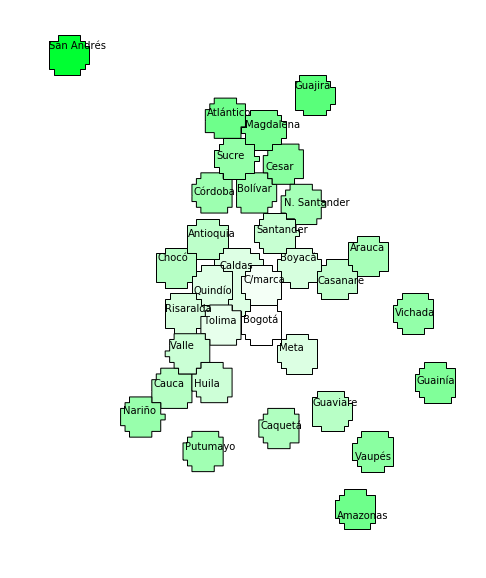

In [15]:
fig = plt.figure(figsize=(8, 10))
plt.axis('off')
ax = fig.gca() 

for feat in data_map["features"]:
    geom = asShape(feat["geometry"])
    x, y = geom.centroid.x, geom.centroid.y
    ax.plot(x, y, '-')
    d_name = feat["properties"]["DPTO"]
    #d_name = feat["properties"]["STD_ID"]
    #STD_ID
    value = s.loc[d_name]
    color = simple_scale(value, min_val=s.min(), max_val=s.max(), lower_value=bottom_value, upper_value=top_value)
    #if value > 33:
    #    color = top_value
    #else:
    #    color = bottom_value
    ax.add_patch(PolygonPatch(feat["geometry"], fc=[color[0]/255,color[1]/255,color[2]/255], ec='black',
                alpha=1, lw=1, ls='-', zorder=2))
    ax.text(x-0.6, y + (np.random.rand() - 0.55)*0.55, d_names[d_name], fontsize=10)

In [16]:
colors_color_bar = []
for i in range(int(s.min()) + 1, int(s.max()) + 1):
    #if i%2 == 0:
    #    color = div_scale(i, min_val=s.min(), zero_val=33, max_val=s.max(), lower_color=bottom_value, zero_color=zero_value, upper_color=top_value)
    #    colors_color_bar.append((color[0]/255, color[1]/255, color[2]/255))
    color = simple_scale(i, min_val=s.min(), max_val=s.max(), lower_value=bottom_value, upper_value=top_value)
    colors_color_bar.append((color[0]/255, color[1]/255, color[2]/255))

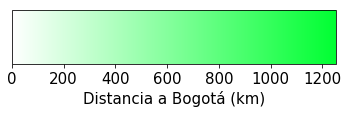

In [34]:
# Make a figure and axes with dimensions as desired.
fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.15])

# Set the colormap and norm to correspond to the data for which
# the colorbar will be used.
cmap= matplotlib.colors.ListedColormap(colors_color_bar)
norm = mpl.colors.Normalize(vmin=s.min(), vmax=s.max())

cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')
cb1.set_label('Distancia a Bogotá (km)', size=15)
cb1.ax.tick_params(labelsize=15) 

In [27]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df["anticorrupcion2018"],df["dist_bogota"])
line = slope*df["anticorrupcion2018"]+intercept

In [33]:
data_points = Scatter(x=df["anticorrupcion2018"], y=df["dist_bogota"], 
                line=dict(color='rgb(0,0,0)'),
                mode = 'markers')

trace = Scatter(
                  x=df["anticorrupcion2018"],
                  y=line,
                  mode='lines',
                  name='Fit'
                  )

layout = Layout(
    title='Centralismo',
    xaxis=dict(
        title='Porcentaje de votación (%)'
    ),
    yaxis=dict(
        title='Distancia a Bogotá (km)'
    )
)

fig = dict( data=[data_points, trace], layout=layout )
#iplot( fig, filename='plot.html' )
print_div(plot(fig, include_plotlyjs=False, output_type='div'))

<div id="56538d02-3536-460c-ac04-46168493f179" style="height: 100%; width: 100%;" class="plotly-graph-div"></div><script type="text/javascript">window.PLOTLYENV=window.PLOTLYENV || {};window.PLOTLYENV.BASE_URL="https://plot.ly";Plotly.newPlot("56538d02-3536-460c-ac04-46168493f179", [{"line": {"color": "rgb(0,0,0)"}, "mode": "markers", "x": [18.5, 27.32, 24.64, 23.53, 45.74, 21.63, 41.38, 37.18, 25.05, 33.87, 31.3, 22.61, 18.49, 18.72, 41.69, 17.26, 12.78, 23.22, 34.16, 19.51, 35.94, 35.79, 27.81, 30.76, 36.39, 36.05, 19.9, 38.44, 22.38, 31.75, 34.33, 16.96, 14.71], "y": [715.0, 329.0, 436.0, 714.0, 0.0, 493.0, 203.0, 170.0, 391.0, 311.0, 362.0, 587.0, 360.0, 485.0, 57.0, 627.0, 818.0, 352.0, 250.0, 660.0, 175.0, 509.0, 444.0, 465.0, 165.0, 208.0, 1253.0, 276.0, 540.0, 119.0, 261.0, 575.0, 531.0], "type": "scatter", "uid": "832ca502-af19-11e8-8e84-74dfbfa11db1"}, {"mode": "lines", "name": "Fit", "x": [18.5, 27.32, 24.64, 23.53, 45.74, 21.63, 41.38, 37.18, 25.05, 33.87, 31.3, 22.61, 18.4